## Compare the results of the 2-encoders and 1-encoder models

** This notebook compares the results of the 2-encoders and 1-encoder models.**

The 2-encoders model is trained with the review comment *rnl*  and the function that the comment is associated with *ms*. 
The 1-encoder model is trained with the function on review *ms* only. 

**Results** 
- The 2-encoders model performs better than the 1-encoder model.
- Overall results are not as good as the results in the paper. 
    - In the paper 1-encoder model with the beam size of 1 achieves 2.91% perfect prediction rate. In our experiment, the 1-encoder model with the beam size of 1 achieves 1.5% perfect prediction rate.
    - In the paper 1-encoder model with the beam size of 10 achieves 15.76% perfect prediction rate. In our experiment, the 1-encoder model with the beam size of 10 achieves 10.34% perfect prediction rate.
    - In the paper 2-encoders model with the beam size of 1 achieves 12.16% perfect prediction rate. In our experiment, the 2-encoders model with the beam size of 1 achieves 4.7% perfect prediction rate.
    - In the paper 2-encoders model with the beam size of 10 achieves 30.72% perfect prediction rate. In our experiment, the 2-encoders model with the beam size of 10 achieves 20.93% perfect prediction rate.

- This difference may be due to the difference in the dataset. The paper uses the dataset from both the Gerrit and the GitHub which creates a total of 17194 training data. However, our experiment uses the dataset from the GitHub only which creates a total of 8315 training data. Also the paper uses 2566 different GitHub projects while our experiment uses 1986 different GitHub projects.

In [1]:
import pandas as pd
import numpy as np
from nltk.translate.bleu_score import sentence_bleu
from nltk.metrics.distance import edit_distance
import matplotlib.pyplot as plt



## Load the data

In [2]:
two_encoders_one_beam_predictions_path = "./code/2-encoders/predictions.txt"
two_encoders_three_beam_predictions_path = "./code/2-encoders/3_beam_predictions.txt"
two_encoders_five_beam_predictions_path = "./code/2-encoders/5_beam_predictions.txt"
two_encoders_ten_beam_predictions_path = "./code/2-encoders/10_beam_predictions.txt"

one_encoder_one_beam_predictions_path = "./code/1-encoder/predictions.txt"
one_encoder_three_beam_predictions_path = "./code/1-encoder/3_beam_predictions.txt"
one_encoder_five_beam_predictions_path = "./code/1-encoder/5_beam_predictions.txt"
one_encoder_ten_beam_predictions_path = "./code/1-encoder/10_beam_predictions.txt"


two_encoders_target_path = "./datasets/2-encoders/test/tgt-test.txt"
two_encoers_ms_path = "./datasets/2-encoders/test/src1-test.txt"
two_encoders_rnl_path = "./datasets/2-encoders/test/src2-test.txt"

one_encoder_target_path = "./datasets/1-encoder/test/tgt-test.txt"
one_encoder_ms_path = "./datasets/1-encoder/test/src-test.txt"

dataset_with_mapping_path = "./datasets/ms_mr_rnl_map_dataset.csv"

two_encoders_one_beam_predictions = open(two_encoders_one_beam_predictions_path, "r").readlines()
two_encoders_three_beam_predictions = open(two_encoders_three_beam_predictions_path, "r").readlines()
two_encoders_five_beam_predictions = open(two_encoders_five_beam_predictions_path, "r").readlines()
two_encoders_ten_beam_predictions = open(two_encoders_ten_beam_predictions_path, "r").readlines()

one_encoder_one_beam_predictions = open(one_encoder_one_beam_predictions_path, "r").readlines()
one_encoder_three_beam_predictions = open(one_encoder_three_beam_predictions_path, "r").readlines()
one_encoder_five_beam_predictions = open(one_encoder_five_beam_predictions_path, "r").readlines() 
one_encoder_ten_beam_predictions = open(one_encoder_ten_beam_predictions_path, "r").readlines()

two_encoders_target = open(two_encoders_target_path, "r").readlines()
two_encoders_ms = open(two_encoers_ms_path, "r").readlines()
two_encoders_rnl = open(two_encoders_rnl_path, "r").readlines()

one_encoder_target = open(one_encoder_target_path, "r").readlines()
one_encoder_ms = open(one_encoder_ms_path, "r").readlines()

dataset_with_mapping = pd.read_csv(dataset_with_mapping_path)

In [3]:
mapped_data = "../data/ms_mr_rnl_map_dataset.csv"

## Perfect Prediction Rate

In [4]:
def correct_predictions_percentage_beam(predictions, targets, beam_size):
    assert len(predictions) % len(targets) == 0
    assert len(predictions) // len(targets) == beam_size

    current_target_index = 0
    correct_predictions = 0

    for i in range(0, len(predictions), beam_size):
        for j in range(beam_size):
            if predictions[i + j].strip() == targets[current_target_index].strip():
                correct_predictions += 1
                break
        current_target_index += 1

    return correct_predictions / len(targets) * 100


In [5]:
print("2 encoders 1 beam perfect prediction percentage: ", correct_predictions_percentage_beam(two_encoders_one_beam_predictions, two_encoders_target, beam_size=1), "%")
print("2 encoders 3 beam perfect prediction percentage: ", correct_predictions_percentage_beam(two_encoders_three_beam_predictions, two_encoders_target, beam_size=3), "%")
print("2 encoders 5 beam perfect prediction percentage: ", correct_predictions_percentage_beam(two_encoders_five_beam_predictions, two_encoders_target, beam_size=5), "%")
print("2 encoders 10 beam perfect prediction percentage: ", correct_predictions_percentage_beam(two_encoders_ten_beam_predictions, two_encoders_target, beam_size=10), "%")
print ("-" * 100)
print("1 encoder perfect prediction percentage: ", correct_predictions_percentage_beam(one_encoder_one_beam_predictions, one_encoder_target, beam_size=1), "%")
print("1 encoder 3 beam perfect prediction percentage: ", correct_predictions_percentage_beam(one_encoder_three_beam_predictions, one_encoder_target, beam_size=3), "%")
print("1 encoder 5 beam perfect prediction percentage: ", correct_predictions_percentage_beam(one_encoder_five_beam_predictions, one_encoder_target, beam_size=5), "%")
print("1 encoder 10 beam perfect prediction percentage: ", correct_predictions_percentage_beam(one_encoder_ten_beam_predictions, one_encoder_target, beam_size=10), "%")


2 encoders 1 beam perfect prediction percentage:  4.813477737665464 %
2 encoders 3 beam perfect prediction percentage:  12.154031287605296 %
2 encoders 5 beam perfect prediction percentage:  14.921780986762936 %
2 encoders 10 beam perfect prediction percentage:  20.938628158844764 %
----------------------------------------------------------------------------------------------------
1 encoder perfect prediction percentage:  1.5643802647412757 %
1 encoder 3 beam perfect prediction percentage:  5.054151624548736 %
1 encoder 5 beam perfect prediction percentage:  5.415162454873646 %
1 encoder 10 beam perfect prediction percentage:  10.348977135980746 %


## Perfect Prediction Samples

In [6]:
def get_correct_predictions_beam(predictions, targets, beam_size):
    assert len(predictions) % len(targets) == 0
    assert len(predictions) // len(targets) == beam_size

    current_target_index = 0
    correct_predictions_list = []

    for i in range(0, len(predictions), beam_size):
        for j in range(beam_size):
            if predictions[i + j].strip() == targets[current_target_index].strip():
                correct_prediction_positions = {
                    "prediction": i + j,
                    "target": current_target_index,
                }
                correct_predictions_list.append(correct_prediction_positions)
                break
        current_target_index += 1

    return correct_predictions_list


In [7]:
two_encoders_one_beam_correct_predictions = get_correct_predictions_beam(two_encoders_one_beam_predictions, two_encoders_target, beam_size=1)
two_encoders_three_beam_correct_predictions = get_correct_predictions_beam(two_encoders_three_beam_predictions, two_encoders_target, beam_size=3)
two_encoders_five_beam_correct_predictions = get_correct_predictions_beam(two_encoders_five_beam_predictions, two_encoders_target, beam_size=5)
two_encoders_ten_beam_correct_predictions = get_correct_predictions_beam(two_encoders_ten_beam_predictions, two_encoders_target, beam_size=10)

one_encoder_one_beam_correct_predictions = get_correct_predictions_beam(one_encoder_one_beam_predictions, one_encoder_target, beam_size=1)
one_encoder_three_beam_correct_predictions = get_correct_predictions_beam(one_encoder_three_beam_predictions, one_encoder_target, beam_size=3)
one_encoder_five_beam_correct_predictions = get_correct_predictions_beam(one_encoder_five_beam_predictions, one_encoder_target, beam_size=5)
one_encoder_ten_beam_correct_predictions = get_correct_predictions_beam(one_encoder_ten_beam_predictions, one_encoder_target, beam_size=10)

print("2 encoders 1 beam correct predictions: ", two_encoders_one_beam_correct_predictions)
print("2 encoders 3 beam correct predictions: ", two_encoders_three_beam_correct_predictions)
print("2 encoders 5 beam correct predictions: ", two_encoders_five_beam_correct_predictions)
print("2 encoders 10 beam correct predictions: ", two_encoders_ten_beam_correct_predictions)
print ("-" * 100)
print("1 encoder correct predictions: ", one_encoder_one_beam_correct_predictions)
print("1 encoder 3 beam correct predictions: ", one_encoder_three_beam_correct_predictions)
print("1 encoder 5 beam correct predictions: ", one_encoder_five_beam_correct_predictions)
print("1 encoder 10 beam correct predictions: ", one_encoder_ten_beam_correct_predictions)


2 encoders 1 beam correct predictions:  [{'prediction': 90, 'target': 90}, {'prediction': 95, 'target': 95}, {'prediction': 134, 'target': 134}, {'prediction': 136, 'target': 136}, {'prediction': 140, 'target': 140}, {'prediction': 191, 'target': 191}, {'prediction': 238, 'target': 238}, {'prediction': 263, 'target': 263}, {'prediction': 278, 'target': 278}, {'prediction': 287, 'target': 287}, {'prediction': 296, 'target': 296}, {'prediction': 337, 'target': 337}, {'prediction': 351, 'target': 351}, {'prediction': 367, 'target': 367}, {'prediction': 380, 'target': 380}, {'prediction': 382, 'target': 382}, {'prediction': 398, 'target': 398}, {'prediction': 420, 'target': 420}, {'prediction': 435, 'target': 435}, {'prediction': 456, 'target': 456}, {'prediction': 484, 'target': 484}, {'prediction': 492, 'target': 492}, {'prediction': 525, 'target': 525}, {'prediction': 574, 'target': 574}, {'prediction': 606, 'target': 606}, {'prediction': 613, 'target': 613}, {'prediction': 649, 'target

In [8]:
print ("2 encoders 1 beam perfect prediction count: ", len(two_encoders_one_beam_correct_predictions) )
print ("2 encoders 3 beam perfect prediction count: ", len(two_encoders_three_beam_correct_predictions))
print ("2 encoders 5 beam perfect prediction count: ", len(two_encoders_five_beam_correct_predictions))
print ("2 encoders 10 beam perfect prediction count: ", len(two_encoders_ten_beam_correct_predictions))

print ("1 encoder 1 beam perfect prediction count: ", len(one_encoder_one_beam_correct_predictions))
print ("1 encoder 3 beam perfect prediction count: ", len(one_encoder_three_beam_correct_predictions))
print ("1 encoder 5 beam perfect prediction count: ", len(one_encoder_five_beam_correct_predictions))
print ("1 encoder 10 beam perfect prediction count: ", len(one_encoder_ten_beam_correct_predictions))



2 encoders 1 beam perfect prediction count:  40
2 encoders 3 beam perfect prediction count:  101
2 encoders 5 beam perfect prediction count:  124
2 encoders 10 beam perfect prediction count:  174
1 encoder 1 beam perfect prediction count:  13
1 encoder 3 beam perfect prediction count:  42
1 encoder 5 beam perfect prediction count:  45
1 encoder 10 beam perfect prediction count:  86


In [9]:
def get_mapping(ms):
    ms = ms.replace("\n", "")
    map_str = dataset_with_mapping[dataset_with_mapping["ms"] == ms]["map"].values[0]
    mapping = eval(map_str)
    return mapping

def revert_abstracted_data(data, mapping):
    for key, value in mapping.items():
        data = data.replace(value, key)
    return data

def print_sample(ms, rnl, prediction, target, mapping):
    print("MS Abstracted: ", ms)
    print("MS: ", revert_abstracted_data(ms, mapping))

    if rnl is not None:
        print("RNL Abstracted: ", rnl)
        print("RNL: ", revert_abstracted_data(rnl, mapping))

    print("Prediction Abstracted: ", prediction)
    print("Prediction: ", revert_abstracted_data(prediction, mapping))

    print("Target Abstracted: ", target)
    print("Target: ", revert_abstracted_data(target, mapping))

def get_sample(index, ms, rnl, predictions, target, correct_predictions):
    mapping = get_mapping(ms[index])
    target_sample = target[index]
    
    prediction_index = correct_predictions[index]['prediction']
    prediction = predictions[prediction_index]
    
    print_sample(ms[index], rnl[index] if rnl else None, prediction, target_sample, mapping)



#### 1 Beam Size Samples

In [10]:
print("Sample 2 encoder 1 beam size: ")
get_sample(0, two_encoders_ms, two_encoders_rnl, two_encoders_one_beam_predictions, two_encoders_target, two_encoders_one_beam_correct_predictions)
print("-" * 100)
print("Sample 1 encoder 1 beam size: ")
get_sample(0, one_encoder_ms, None, one_encoder_one_beam_predictions, one_encoder_target, one_encoder_one_beam_correct_predictions)

Sample 2 encoder 1 beam size: 
MS Abstracted:  public void METHOD_1 ( TYPE_1 VAR_1 , final String VAR_2 ) { for ( TYPE_2 < String , TYPE_3 > VAR_3 : VAR_4 . METHOD_2 ( ) ) { if ( VAR_2 . equals ( VAR_3 . METHOD_3 ( ) ) ) { VAR_3 . getValue ( ) . METHOD_1 ( VAR_1 ) ; } } }

MS:  public void registerSpecialPathInfo ( SpecialPathInfo pathInfo , final String pkgType ) { for ( Map.Entry < String , SpecialPathSet > entry : pkgtypes . entrySet ( ) ) { if ( pkgType . equals ( entry . getKey ( ) ) ) { entry . getValue ( ) . registerSpecialPathInfo ( pathInfo ) ; } } }

RNL Abstracted:  Can _CODE_

RNL:  Can _CODE_

Prediction Abstracted:  public void VAR_1 ( final VAR_2 VAR_1 ) { this . VAR_1 = VAR_1 ; } }

Prediction:  public void pathInfo ( final pkgType pathInfo ) { this . pathInfo = pathInfo ; } }

Target Abstracted:  public void METHOD_1 ( TYPE_1 VAR_1 , final String VAR_2 ) { VAR_4 . get ( VAR_2 ) . METHOD_1 ( VAR_1 ) ; }

Target:  public void registerSpecialPathInfo ( SpecialPathInfo pat

#### 10 Beam Size Samples

In [11]:
print("Sample 2 encoder with 10 beam: ")
get_sample(0, two_encoders_ms, two_encoders_rnl, two_encoders_ten_beam_predictions, two_encoders_target, two_encoders_ten_beam_correct_predictions)
print("-" * 100)
print("Sample 1 encoder with 10 beam: ")
get_sample(0, one_encoder_ms, None, one_encoder_one_beam_predictions, one_encoder_target, one_encoder_one_beam_correct_predictions)



Sample 2 encoder with 10 beam: 
MS Abstracted:  public void METHOD_1 ( TYPE_1 VAR_1 , final String VAR_2 ) { for ( TYPE_2 < String , TYPE_3 > VAR_3 : VAR_4 . METHOD_2 ( ) ) { if ( VAR_2 . equals ( VAR_3 . METHOD_3 ( ) ) ) { VAR_3 . getValue ( ) . METHOD_1 ( VAR_1 ) ; } } }

MS:  public void registerSpecialPathInfo ( SpecialPathInfo pathInfo , final String pkgType ) { for ( Map.Entry < String , SpecialPathSet > entry : pkgtypes . entrySet ( ) ) { if ( pkgType . equals ( entry . getKey ( ) ) ) { entry . getValue ( ) . registerSpecialPathInfo ( pathInfo ) ; } } }

RNL Abstracted:  Can _CODE_

RNL:  Can _CODE_

Prediction Abstracted:  public static TYPE_1 METHOD_1 ( String VAR_1 ) { try { return TYPE_1 . METHOD_2 ( VAR_1 ) ; } catch ( final TYPE_2 VAR_2 ) { TYPE_3 VAR_3 = TYPE_4 . METHOD_1 ( VAR_1 ) ; if ( null == VAR_3 ) { return null ; } try { return TYPE_1 . METHOD_3 ( VAR_3 ) ; } catch ( final TYPE_2 VAR_4 ) { return null ; } } }

Prediction:  public static SpecialPathInfo registerSpec

## BLEU-4 Score

In [12]:
import numpy as np
from nltk.translate.bleu_score import sentence_bleu

def calculate_bleu_scores_beam(targets, flat_predictions, beam_size):
    # Reshape the flat predictions list into a nested list with beam_size candidates per input
    predictions = [flat_predictions[i:i + beam_size] for i in range(0, len(flat_predictions), beam_size)]

    bleu_scores = []
    
    for target, candidates in zip(targets, predictions):
        target_tokens = target.split()
        candidate_bleu_scores = []
        
        for prediction in candidates:
            prediction_tokens = prediction.split()
            bleu_4_score = sentence_bleu([target_tokens], prediction_tokens, weights=(0.25, 0.25, 0.25, 0.25))
            candidate_bleu_scores.append(bleu_4_score)
        
        # Choose the highest BLEU score among the candidates
        max_bleu_score = max(candidate_bleu_scores)
        bleu_scores.append(max_bleu_score)

    # Convert the list of BLEU-4 scores to a numpy array
    bleu_scores_array = np.array(bleu_scores)

    # Calculate mean, median, and standard deviation
    mean_bleu = np.mean(bleu_scores_array)
    median_bleu = np.median(bleu_scores_array)
    std_bleu = np.std(bleu_scores_array)

    return mean_bleu, median_bleu, std_bleu


In [13]:


mean_2_encoders_1_beam, median_2_encoders_1_beam, std_2_encoders_1_beam = calculate_bleu_scores_beam(two_encoders_target, two_encoders_one_beam_predictions, 1)
mean_2_encoders_3_beam, median_2_encoders_3_beam, std_2_encoders_3_beam = calculate_bleu_scores_beam(two_encoders_target, two_encoders_three_beam_predictions ,3)
mean_2_encoders_5_beam, median_2_encoders_5_beam, std_2_encoders_5_beam = calculate_bleu_scores_beam(two_encoders_target, two_encoders_five_beam_predictions ,5)
mean_2_encoders_10_beam, median_2_encoders_10_beam, std_2_encoders_10_beam = calculate_bleu_scores_beam(two_encoders_target, two_encoders_ten_beam_predictions ,10)

mean_1_encoder_1_beam, median_1_encoder_1_beam, std_1_encoder_1_beam = calculate_bleu_scores_beam(one_encoder_target, one_encoder_one_beam_predictions ,1)
mean_1_encoder_3_beam, median_1_encoder_3_beam, std_1_encoder_3_beam = calculate_bleu_scores_beam(one_encoder_target, one_encoder_three_beam_predictions ,3)
mean_1_encoder_5_beam, median_1_encoder_5_beam, std_1_encoder_5_beam = calculate_bleu_scores_beam(one_encoder_target, one_encoder_five_beam_predictions ,5)
mean_1_encoder_10_beam, median_1_encoder_10_beam, std_1_encoder_10_beam = calculate_bleu_scores_beam(one_encoder_target,one_encoder_ten_beam_predictions ,10)

print("2 encoders 1 beam: Mean BLEU-4 score:", mean_2_encoders_1_beam, "Median BLEU-4 score:", median_2_encoders_1_beam, "Standard deviation of BLEU-4 scores:", std_2_encoders_1_beam)
print("2 encoders 3 beam: Mean BLEU-4 score:", mean_2_encoders_3_beam, "Median BLEU-4 score:", median_2_encoders_3_beam, "Standard deviation of BLEU-4 scores:", std_2_encoders_3_beam)
print("2 encoders 5 beam: Mean BLEU-4 score:", mean_2_encoders_5_beam, "Median BLEU-4 score:", median_2_encoders_5_beam, "Standard deviation of BLEU-4 scores:", std_2_encoders_5_beam)
print("2 encoders 10 beam: Mean BLEU-4 score:", mean_2_encoders_10_beam, "Median BLEU-4 score:", median_2_encoders_10_beam, "Standard deviation of BLEU-4 scores:", std_2_encoders_10_beam)
print("-" * 100)
print("1 encoder 1 beam: Mean BLEU-4 score:", mean_1_encoder_1_beam, "Median BLEU-4 score:", median_1_encoder_1_beam, "Standard deviation of BLEU-4 scores:", std_1_encoder_1_beam)
print("1 encoder 3 beam: Mean BLEU-4 score:", mean_1_encoder_3_beam, "Median BLEU-4 score:", median_1_encoder_3_beam, "Standard deviation of BLEU-4 scores:", std_1_encoder_3_beam)
print("1 encoder 5 beam: Mean BLEU-4 score:", mean_1_encoder_5_beam, "Median BLEU-4 score:", median_1_encoder_5_beam, "Standard deviation of BLEU-4 scores:", std_1_encoder_5_beam)
print("1 encoder 10 beam: Mean BLEU-4 score:", mean_1_encoder_10_beam, "Median BLEU-4 score:", median_1_encoder_10_beam, "Standard deviation of BLEU-4 scores:", std_1_encoder_10_beam)


/Users/melih/miniforge3/lib/python3.9/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/melih/miniforge3/lib/python3.9/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/melih/miniforge3/lib/python3.9/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use S

2 encoders 1 beam: Mean BLEU-4 score: 0.7465828302804252 Median BLEU-4 score: 0.806244859667643 Standard deviation of BLEU-4 scores: 0.21109152652142416
2 encoders 3 beam: Mean BLEU-4 score: 0.8003354223373198 Median BLEU-4 score: 0.853999516361811 Standard deviation of BLEU-4 scores: 0.19115301142815566
2 encoders 5 beam: Mean BLEU-4 score: 0.8191778002767355 Median BLEU-4 score: 0.8726065619470363 Standard deviation of BLEU-4 scores: 0.18305538892271997
2 encoders 10 beam: Mean BLEU-4 score: 0.8413821352028492 Median BLEU-4 score: 0.8877181162449961 Standard deviation of BLEU-4 scores: 0.1746417565171061
----------------------------------------------------------------------------------------------------
1 encoder 1 beam: Mean BLEU-4 score: 0.640549641986339 Median BLEU-4 score: 0.6681666024145695 Standard deviation of BLEU-4 scores: 0.1991601981851739
1 encoder 3 beam: Mean BLEU-4 score: 0.7334214187299155 Median BLEU-4 score: 0.7619170283489454 Standard deviation of BLEU-4 scores: 0

## Levenshtein Distance

In [14]:
def calculate_levenshtein_scores_beam(targets, flat_predictions, beam_size):
    distances = []

    for i, target in enumerate(targets):
        target_distances = []
        for j in range(beam_size):
            prediction = flat_predictions[i * beam_size + j]
            distance = edit_distance(target, prediction) / max(len(target), len(prediction))
            target_distances.append(distance)
        
        min_distance = min(target_distances)
        distances.append(min_distance)

    distances_array = np.array(distances)
    mean_distance = np.mean(distances_array)
    median_distance = np.median(distances_array)
    std_distance = np.std(distances_array)

    return mean_distance, median_distance, std_distance

In [15]:
mean_2_encoders_1_beam, median_2_encoders_1_beam, std_2_encoders_1_beam = calculate_levenshtein_scores_beam(two_encoders_target, two_encoders_one_beam_predictions, 1)
mean_2_encoders_3_beam, median_2_encoders_3_beam, std_2_encoders_3_beam = calculate_levenshtein_scores_beam(two_encoders_target, two_encoders_three_beam_predictions ,3)
mean_2_encoders_5_beam, median_2_encoders_5_beam, std_2_encoders_5_beam = calculate_levenshtein_scores_beam(two_encoders_target, two_encoders_five_beam_predictions ,5)
mean_2_encoders_10_beam, median_2_encoders_10_beam, std_2_encoders_10_beam = calculate_levenshtein_scores_beam(two_encoders_target, two_encoders_ten_beam_predictions ,10)

mean_1_encoder_1_beam, median_1_encoder_1_beam, std_1_encoder_1_beam = calculate_levenshtein_scores_beam(one_encoder_target, one_encoder_one_beam_predictions ,1)
mean_1_encoder_3_beam, median_1_encoder_3_beam, std_1_encoder_3_beam = calculate_levenshtein_scores_beam(one_encoder_target, one_encoder_three_beam_predictions ,3)
mean_1_encoder_5_beam, median_1_encoder_5_beam, std_1_encoder_5_beam = calculate_levenshtein_scores_beam(one_encoder_target, one_encoder_five_beam_predictions ,5)
mean_1_encoder_10_beam, median_1_encoder_10_beam, std_1_encoder_10_beam = calculate_levenshtein_scores_beam(one_encoder_target,one_encoder_ten_beam_predictions ,10)

print("2 encoders 1 beam: Mean Levenshtein distance:", mean_2_encoders_1_beam, "Median Levenshtein distance:", median_2_encoders_1_beam, "Standard deviation of Levenshtein distances:", std_2_encoders_1_beam)
print("2 encoders 3 beam: Mean Levenshtein distance:", mean_2_encoders_3_beam, "Median Levenshtein distance:", median_2_encoders_3_beam, "Standard deviation of Levenshtein distances:", std_2_encoders_3_beam)
print("2 encoders 5 beam: Mean Levenshtein distance:", mean_2_encoders_5_beam, "Median Levenshtein distance:", median_2_encoders_5_beam, "Standard deviation of Levenshtein distances:", std_2_encoders_5_beam)
print("2 encoders 10 beam: Mean Levenshtein distance:", mean_2_encoders_10_beam, "Median Levenshtein distance:", median_2_encoders_10_beam, "Standard deviation of Levenshtein distances:", std_2_encoders_10_beam)
print("-" * 100)
print("1 encoder 1 beam: Mean Levenshtein distance:", mean_1_encoder_1_beam, "Median Levenshtein distance:", median_1_encoder_1_beam, "Standard deviation of Levenshtein distances:", std_1_encoder_1_beam)
print("1 encoder 3 beam: Mean Levenshtein distance:", mean_1_encoder_3_beam, "Median Levenshtein distance:", median_1_encoder_3_beam, "Standard deviation of Levenshtein distances:", std_1_encoder_3_beam)
print("1 encoder 5 beam: Mean Levenshtein distance:", mean_1_encoder_5_beam, "Median Levenshtein distance:", median_1_encoder_5_beam, "Standard deviation of Levenshtein distances:", std_1_encoder_5_beam)
print("1 encoder 10 beam: Mean Levenshtein distance:", mean_1_encoder_10_beam, "Median Levenshtein distance:", median_1_encoder_10_beam, "Standard deviation of Levenshtein distances:", std_1_encoder_10_beam)



2 encoders 1 beam: Mean Levenshtein distance: 0.19628312500727477 Median Levenshtein distance: 0.15633423180592992 Standard deviation of Levenshtein distances: 0.1651623609796915
2 encoders 3 beam: Mean Levenshtein distance: 0.1509059670819116 Median Levenshtein distance: 0.10828025477707007 Standard deviation of Levenshtein distances: 0.14814453613807768
2 encoders 5 beam: Mean Levenshtein distance: 0.13658158478572605 Median Levenshtein distance: 0.0945273631840796 Standard deviation of Levenshtein distances: 0.14201199107860346
2 encoders 10 beam: Mean Levenshtein distance: 0.11752060521633477 Median Levenshtein distance: 0.07511737089201878 Standard deviation of Levenshtein distances: 0.1338770918353428
----------------------------------------------------------------------------------------------------
1 encoder 1 beam: Mean Levenshtein distance: 0.24845033371943762 Median Levenshtein distance: 0.22666666666666666 Standard deviation of Levenshtein distances: 0.15072091942034
1 enco

## Results Graphs

In [16]:
def plot_line(x, y, title, xlabel, ylabel, labels=None, marker='o-', grid=True):
    fig, ax = plt.subplots()
    
    for i, yi in enumerate(y):
        if labels:
            ax.plot(x, yi, marker, label=labels[i])
        else:
            ax.plot(x, yi, marker)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(grid)
    
    if labels:
        ax.legend()

    plt.show()


In [17]:
def plot_bar(x, y, title, xlabel, ylabel, labels=None, width=0.35, grid=True):
    fig, ax = plt.subplots()

    x = np.arange(len(x))
    for i, yi in enumerate(y):
        if labels:
            ax.bar(x - width / 2 + width * i, yi, width, label=labels[i])
        else:
            ax.bar(x, yi, width)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(x)
    ax.set_xticklabels(beam_sizes)
    ax.grid(grid, axis='y')
    
    if labels:
        ax.legend()

    plt.show()

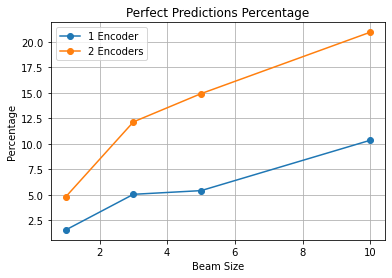

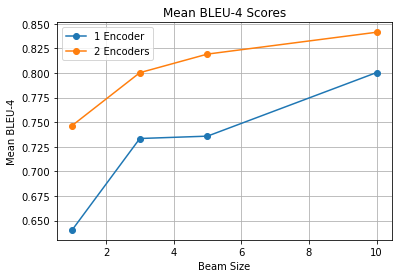

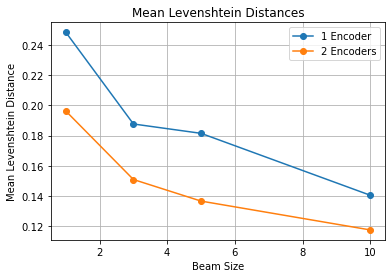

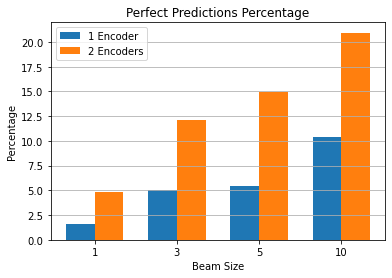

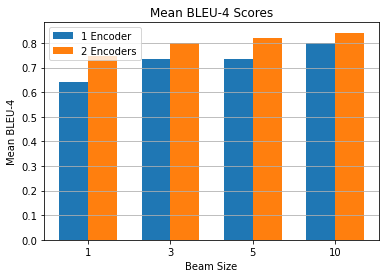

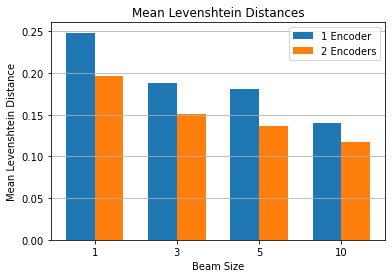

In [18]:
beam_sizes = [1, 3, 5, 10]

# Perfect Predictions
perfect_predictions = [
    [13, 42, 45, 86],
    [40, 101, 124, 174]
]

# Perfect Predictions Percentage
perfect_predictions_percentage = [
    [1.5643802647412757, 5.054151624548736, 5.415162454873646, 10.348977135980746],
    [4.813477737665464, 12.154031287605296, 14.921780986762936, 20.938628158844764]
]

# Mean BLEU-4 Scores
mean_bleu4 = [
    [0.6405, 0.7334, 0.7358, 0.8004],
    [0.7466, 0.8003, 0.8192, 0.8414]
]


# Mean Levenshtein Distances
mean_lev_dist = [
    [0.2485, 0.1877, 0.1815, 0.1405],
    [0.1963, 0.1509, 0.1366, 0.1175]
]

labels = ['1 Encoder', '2 Encoders']

#plot_line(beam_sizes, perfect_predictions, 'Perfect Predictions', 'Beam Size', 'Count', labels)
plot_line(beam_sizes, perfect_predictions_percentage, 'Perfect Predictions Percentage', 'Beam Size', 'Percentage', labels)
plot_line(beam_sizes, mean_bleu4, 'Mean BLEU-4 Scores', 'Beam Size', 'Mean BLEU-4', labels)
plot_line(beam_sizes, mean_lev_dist, 'Mean Levenshtein Distances', 'Beam Size', 'Mean Levenshtein Distance', labels)

#plot_bar(beam_sizes, perfect_predictions, 'Perfect Predictions', 'Beam Size', 'Count', labels)
plot_bar(beam_sizes, perfect_predictions_percentage, 'Perfect Predictions Percentage', 'Beam Size', 'Percentage', labels)
plot_bar(beam_sizes, mean_bleu4, 'Mean BLEU-4 Scores', 'Beam Size', 'Mean BLEU-4', labels)
plot_bar(beam_sizes, mean_lev_dist, 'Mean Levenshtein Distances', 'Beam Size', 'Mean Levenshtein Distance', labels)


### Comparison with the paper

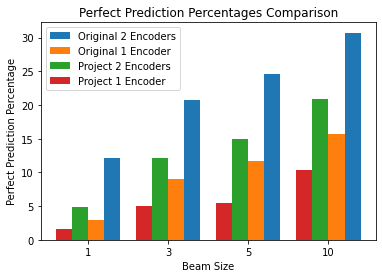

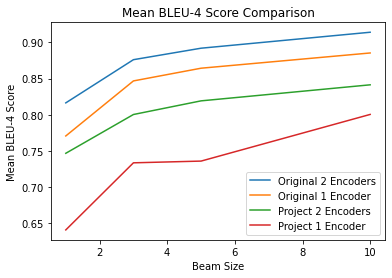

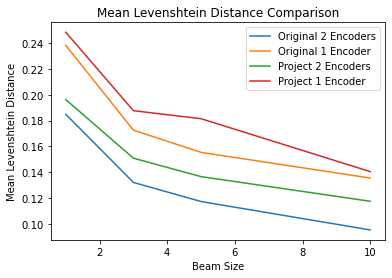

In [21]:
import matplotlib.pyplot as plt
import numpy as np

beam_sizes = [1, 3, 5, 10]

perfect_prediction_percentages = {
    'Original 2 Encoders': [12.16, 20.77, 24.55, 30.72],
    'Original 1 Encoder': [2.91, 9.07, 11.63, 15.76],
    'Project 2 Encoders': [4.81, 12.15, 14.92, 20.94],
    'Project 1 Encoder': [1.56, 5.05, 5.42, 10.35]
}

mean_bleu_4_scores = {
    'Original 2 Encoders': [0.8164, 0.8762, 0.8921, 0.9142],
    'Original 1 Encoder': [0.7706, 0.8468, 0.8644, 0.8855],
    'Project 2 Encoders': [0.7466, 0.8003, 0.8192, 0.8414],
    'Project 1 Encoder': [0.6405, 0.7334, 0.7358, 0.8004]
}

mean_levenshtein_distances = {
    'Original 2 Encoders': [0.1849,0.1321,0.1173,0.0953],
    'Original 1 Encoder': [0.2383,0.1726,0.1554,0.1355],
    'Project 2 Encoders': [0.1963, 0.1509, 0.1366, 0.1175],
    'Project 1 Encoder': [0.2485, 0.1877, 0.1815, 0.1405]
}

labels = list(perfect_prediction_percentages.keys())
data = np.array(list(perfect_prediction_percentages.values()))
x = np.arange(len(beam_sizes))

fig, ax = plt.subplots()
bar_width = 0.2

for i in range(len(labels)):
    ax.bar(x - (i - 1.5) * bar_width, data[i], width=bar_width, label=labels[i])

ax.set_xticks(x)
ax.set_xticklabels(beam_sizes)
ax.set_xlabel('Beam Size')
ax.set_ylabel('Perfect Prediction Percentage')
ax.set_title('Perfect Prediction Percentages Comparison')
ax.legend()

plt.show()

fig2, ax2 = plt.subplots()

for key, value in mean_bleu_4_scores.items():
    ax2.plot(beam_sizes, value, label=key)

ax2.set_xlabel('Beam Size')
ax2.set_ylabel('Mean BLEU-4 Score')
ax2.set_title('Mean BLEU-4 Score Comparison')
ax2.legend()

plt.show()

fig3, ax3 = plt.subplots()

for key, value in mean_levenshtein_distances.items():
    ax3.plot(beam_sizes, value, label=key)

ax3.set_xlabel('Beam Size')
ax3.set_ylabel('Mean Levenshtein Distance')
ax3.set_title('Mean Levenshtein Distance Comparison')
ax3.legend()



## Training Graphs

## 1-encoder model

### 1 Beam

<img width="545" alt="image" src="https://user-images.githubusercontent.com/46859098/236644947-06124430-fd71-42f5-a590-013978daf9dc.png">

<img width="535" alt="image" src="https://user-images.githubusercontent.com/46859098/236645065-2a1b1cfc-52fc-4381-9591-80d8f45d1a68.png">

<img width="549" alt="image" src="https://user-images.githubusercontent.com/46859098/236645089-2ba583a8-6aa7-46cd-8cd6-a11a05ee9f7b.png">



### 10 Beam

<img width="469" alt="image" src="https://user-images.githubusercontent.com/46859098/236666450-f9af1965-f257-4b4a-8448-e662e75a38aa.png">
<img width="782" alt="image" src="https://user-images.githubusercontent.com/46859098/236666474-141b9ca1-5c8c-4ed2-828e-0e2281293120.png">


## 2-encoders model

### 1 Beam

<img width="547" alt="image" src="https://user-images.githubusercontent.com/46859098/236645239-136b89a0-9812-4c55-a024-28537f7e69b5.png">
<img width="542" alt="image" src="https://user-images.githubusercontent.com/46859098/236645258-b9672f9b-fdc0-43e7-af5b-ea75d3a6782d.png">
<img width="537" alt="image" src="https://user-images.githubusercontent.com/46859098/236645268-f216ce2d-ccd9-481b-9929-fd64059dfbbf.png">


### 10 Beam

<img width="423" alt="image" src="https://user-images.githubusercontent.com/46859098/236663474-f63967e2-38af-4a8b-b64c-34065e730b35.png">

<img width="792" alt="image" src="https://user-images.githubusercontent.com/46859098/236663493-c2f67c00-0f37-4b2d-90fb-b63b78744670.png">
